In [110]:
from alpaca_trade_api.rest import REST, TimeFrame
api = REST(key_id="PKX7NWBTMYXT2JU5FBVS", secret_key="FgzjEqmnoHXtDQ1vBHjGCArd1khau7Q868VkJrGA")
#api = REST()
import pandas as pd

In [95]:
class AlpacaDownloader:
    
    def __init__(self):
        pass
    
    def get_quotes(self, symbol, start, end, limit=10000):
        return api.get_quotes(symbol, start, end, limit=limit).df

    
    def get_trades(self, symbol, start, end, limit=10000):
        return api.get_trades(symbol, start, end, limit=limit).df


    def get_bars(self, symbol, start, end, interval=TimeFrame.Day, limit=10000):
        return api.get_bars(symbol, TimeFrame.Hour, start, end, limit=limit).df


In [96]:
ad = AlpacaDownloader()


In [105]:
aapl = ad.get_trades("KXIN", "2021-06-08", "2021-06-09", limit=5al0000)

In [106]:
aapl['time'] = aapl.index

In [107]:
aapl.tail()

,exchange,price,size,conditions,id,tape,time
timestamp,,,,,,,
2021-06-09 22:40:25.187000+00:00,D,2.45,500,"[@, T]",258,C,2021-06-09 22:40:25.187000+00:00
2021-06-09 22:40:25.189000+00:00,D,2.45,500,"[@, T]",259,C,2021-06-09 22:40:25.189000+00:00
2021-06-09 22:47:36.478502912+00:00,P,2.45,20,"[@, T, I]",232,C,2021-06-09 22:47:36.478502912+00:00
2021-06-09 22:47:36.478957863+00:00,Q,2.45,80,"[@, F, T, I]",462,C,2021-06-09 22:47:36.478957863+00:00
2021-06-09 23:01:05.090000+00:00,D,2.45,538,"[@, T]",746,C,2021-06-09 23:01:05.090000+00:00


In [108]:
aapl.resample('30min', on='time', offset='30Min10s')['size'].sum()


time
2021-06-08 08:30:10+00:00       1
2021-06-08 09:00:10+00:00       0
2021-06-08 09:30:10+00:00      20
2021-06-08 10:00:10+00:00       0
2021-06-08 10:30:10+00:00       5
                             ... 
2021-06-09 21:00:10+00:00       1
2021-06-09 21:30:10+00:00    2032
2021-06-09 22:00:10+00:00      33
2021-06-09 22:30:10+00:00    1100
2021-06-09 23:00:10+00:00     538
Freq: 30T, Name: size, Length: 78, dtype: int64

In [84]:
len(aapl)

200000

In [85]:
temp = aapl.rolling(window="1H").sum()

<AxesSubplot:xlabel='timestamp'>

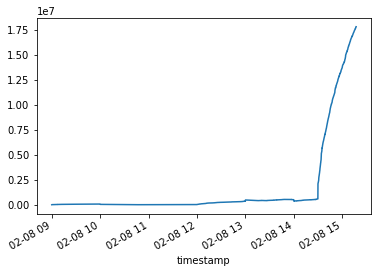

In [86]:
temp['size'].plot()

In [87]:
aapl.tail()

,exchange,price,size,conditions,id,tape,time
timestamp,,,,,,,
2021-02-08 15:17:29.287400+00:00,K,136.07,36,"[@, I]",23464,C,2021-02-08 15:17:29.287400+00:00
2021-02-08 15:17:29.287400+00:00,K,136.07,26,"[@, I]",23465,C,2021-02-08 15:17:29.287400+00:00
2021-02-08 15:17:29.287400+00:00,K,136.07,100,[@],23466,C,2021-02-08 15:17:29.287400+00:00
2021-02-08 15:17:29.287400+00:00,K,136.07,100,[@],23467,C,2021-02-08 15:17:29.287400+00:00
2021-02-08 15:17:29.287400+00:00,K,136.07,67,"[@, I]",23468,C,2021-02-08 15:17:29.287400+00:00


In [114]:
bins = pd.date_range("2021-06-08", "2021-06-09", freq='5min')

aapl["bins"] = pd.cut(aapl.time, bins=bins)
aapl['bins'].sorted()

AttributeError: 'Series' object has no attribute 'sorted'